In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house = pd.read_csv('./data/链家北京租房数据.csv')
house

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11平米,10000
1,东城,北官厅胡同2号院,3室0厅,56.92平米,6000
2,东城,和平里三区,1室1厅,40.57平米,6900
3,东城,菊儿胡同,2室1厅,57.09平米,8000
4,东城,交道口北二条35号院,1室1厅,42.67平米,5500
...,...,...,...,...,...
8218,顺义,怡馨家园,3室1厅,114.03平米,5500
8219,顺义,旭辉26街区,4房间2卫,59平米,5000
8220,顺义,前进花园玉兰苑,3室1厅,92.41平米,5800
8221,顺义,双裕小区,2室1厅,71.81平米,4200


In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 5 columns):
区域         8223 non-null object
小区名称       8223 non-null object
户型         8223 non-null object
面积(㎡)      8223 non-null object
价格(元/月)    8223 non-null int64
dtypes: int64(1), object(4)
memory usage: 321.3+ KB


In [4]:
house = house.drop_duplicates()
house

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11平米,10000
1,东城,北官厅胡同2号院,3室0厅,56.92平米,6000
2,东城,和平里三区,1室1厅,40.57平米,6900
3,东城,菊儿胡同,2室1厅,57.09平米,8000
4,东城,交道口北二条35号院,1室1厅,42.67平米,5500
...,...,...,...,...,...
8218,顺义,怡馨家园,3室1厅,114.03平米,5500
8219,顺义,旭辉26街区,4房间2卫,59平米,5000
8220,顺义,前进花园玉兰苑,3室1厅,92.41平米,5800
8221,顺义,双裕小区,2室1厅,71.81平米,4200


In [5]:
house.columns

Index(['区域', '小区名称', '户型', '面积(㎡)', '价格(元/月)'], dtype='object')

In [6]:
house.loc[:, '面积(㎡)'] = house['面积(㎡)'].str[:-2].astype(np.float64)
house

C:\Users\17634\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500
...,...,...,...,...,...
8218,顺义,怡馨家园,3室1厅,114.03,5500
8219,顺义,旭辉26街区,4房间2卫,59.00,5000
8220,顺义,前进花园玉兰苑,3室1厅,92.41,5800
8221,顺义,双裕小区,2室1厅,71.81,4200


In [7]:
house.loc[:, '户型'] = house['户型'].str.replace('房间', '室')
house

,区域,小区名称,户型,面积(㎡),价格(元/月)
0,东城,万国城MOMA,1室0厅,59.11,10000
1,东城,北官厅胡同2号院,3室0厅,56.92,6000
2,东城,和平里三区,1室1厅,40.57,6900
3,东城,菊儿胡同,2室1厅,57.09,8000
4,东城,交道口北二条35号院,1室1厅,42.67,5500
...,...,...,...,...,...
8218,顺义,怡馨家园,3室1厅,114.03,5500
8219,顺义,旭辉26街区,4室2卫,59.00,5000
8220,顺义,前进花园玉兰苑,3室1厅,92.41,5800
8221,顺义,双裕小区,2室1厅,71.81,4200


In [8]:
house.groupby('区域')['区域'].count().sort_values(ascending=False)

区域
朝阳       1597
海淀        605
丰台        577
通州        477
西城        442
大兴        362
昌平        347
顺义        297
门头沟       285
东城        282
房山        180
石景山       175
亦庄开发区     147
Name: 区域, dtype: int64

In [9]:
#户型数量大于50的元素筛选出来
# house['户型'].value_counts()
house_type = house.groupby('户型')['户型'].count()
house_type = house_type[house_type > 50]
house_type

户型
1室0厅     244
1室1卫     126
1室1厅     844
2室1卫     120
2室1厅    2249
2室2厅     265
3室1卫      92
3室1厅     766
3室2厅     489
4室1厅      58
4室2厅     191
Name: 户型, dtype: int64

In [10]:
house_type.size
for x, y in enumerate(house_type):
    print(x, y)

0 244
1 126
2 844
3 120
4 2249
5 265
6 92
7 766
8 489
9 58
10 191


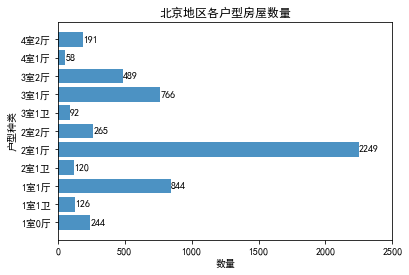

In [18]:
#画图
plt.rcParams['font.sans-serif'] = ['SIMHEI']
plt.barh(range(house_type.size), house_type, alpha=.8)
plt.yticks(range(house_type.size), house_type.index)
plt.xlim(0, 2500)
plt.xlabel('数量')
plt.ylabel('户型种类')
plt.title('北京地区各户型房屋数量')
for x, y in enumerate(house_type):
    plt.text(y+1, x-0.15, y)

In [36]:
# 平均租金分析
print(house['区域'].nunique())
area = house.groupby('区域', sort=False)['区域'].count()
df_all = pd.DataFrame()
df_all['区域'] = area.index
df_all['数量'] = area.values
df_all

13


,区域,数量
0,东城,282
1,丰台,577
2,亦庄开发区,147
3,大兴,362
4,房山,180
5,昌平,347
6,朝阳,1597
7,海淀,605
8,石景山,175
9,西城,442


In [37]:
grouped = house.groupby('区域', sort=False)
sum_price = grouped['价格(元/月)'].sum()
sum_area = grouped['面积(㎡)'].sum()
df_all['房租总金额'] = sum_price.values
df_all['总面积(㎡)'] = sum_area.values
df_all

,区域,数量,房租总金额,总面积(㎡)
0,东城,282,3945550,27353.99
1,丰台,577,4404893,50922.79
2,亦庄开发区,147,1318400,15995.53
3,大兴,362,2286950,35884.15
4,房山,180,726750,15275.41
5,昌平,347,2521515,35972.92
6,朝阳,1597,20281396,166921.72
7,海淀,605,7279350,57210.39
8,石景山,175,1156500,13956.67
9,西城,442,5636975,37141.64


In [38]:
df_all['每平米租金(元)'] = round(df_all['房租总金额'] / df_all['总面积(㎡)'], 2)
df_all

,区域,数量,房租总金额,总面积(㎡),每平米租金(元)
0,东城,282,3945550,27353.99,144.24
1,丰台,577,4404893,50922.79,86.50
2,亦庄开发区,147,1318400,15995.53,82.42
3,大兴,362,2286950,35884.15,63.73
4,房山,180,726750,15275.41,47.58
5,昌平,347,2521515,35972.92,70.09
6,朝阳,1597,20281396,166921.72,121.50
7,海淀,605,7279350,57210.39,127.24
8,石景山,175,1156500,13956.67,82.86
9,西城,442,5636975,37141.64,151.77


In [39]:
# 房源和租金展示图

([<matplotlib.axis.XTick at 0x27510d794c8>,
 <a list of 13 Text xticklabel objects>)

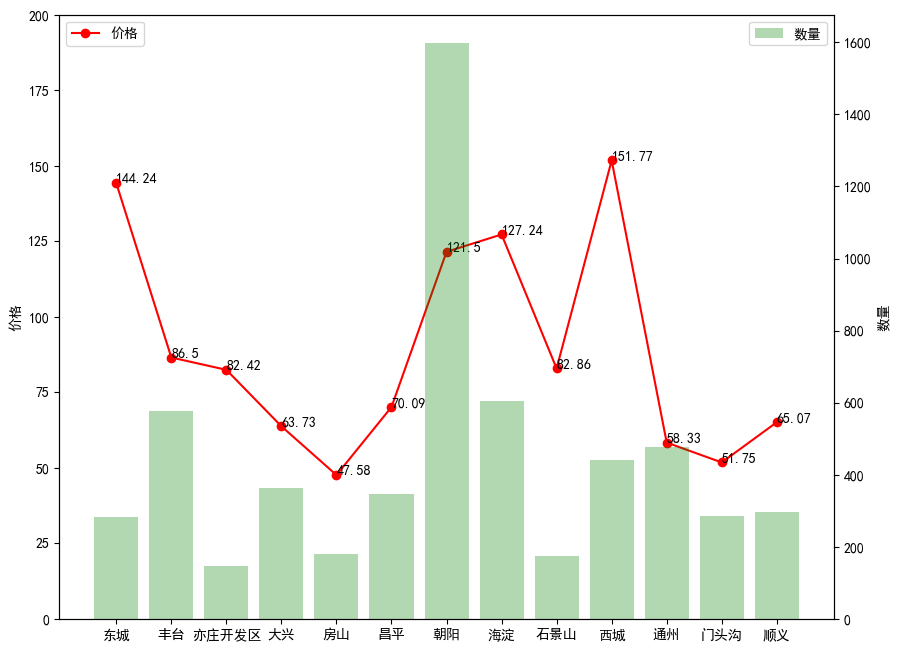

In [41]:
num = df_all['数量']
price = df_all['每平米租金(元)']
l = range(13)
lx = df_all['区域']
fig = plt.figure(figsize=(10, 8), dpi=100)
ax1 = fig.add_subplot(111)
ax1.plot(l, price, 'or-', label='价格')
for i, (_x, _y) in enumerate(zip(l, price)):
    plt.text(_x, _y, price[i])
ax1.set_ylim([0, 200])
ax1.set_ylabel("价格")
plt.legend(loc="upper left")

#显示条形图
ax2 = ax1.twinx() #显示坐标轴ax2
plt.bar(l, num, alpha=.3, color='green', label="数量")
ax2.set_ylabel("数量")
plt.legend(loc='upper right')
plt.xticks(l, lx)